In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

X = pd.read_csv('C:/Users/dontw/Downloads/CC GENERAL.csv') 

X = X.drop('CUST_ID', axis = 1) 

X.fillna(method ='ffill', inplace = True) 

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


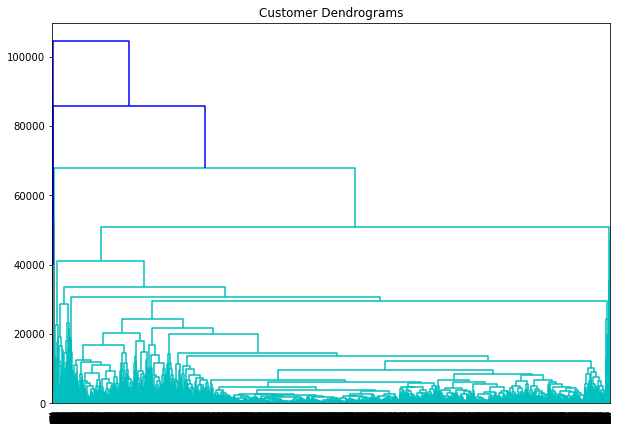

In [31]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

In [32]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

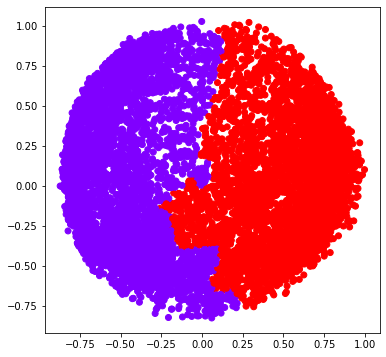

In [33]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

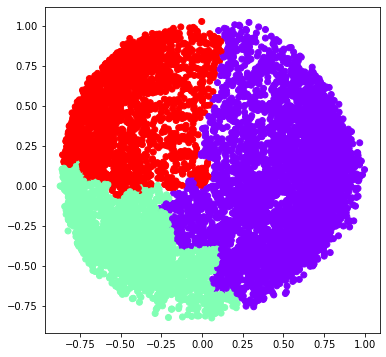

In [41]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

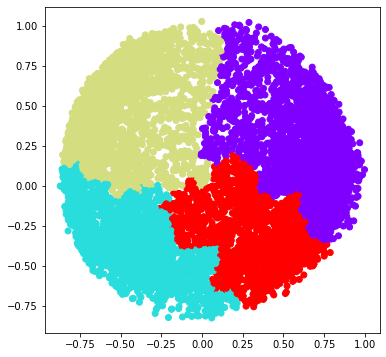

In [40]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

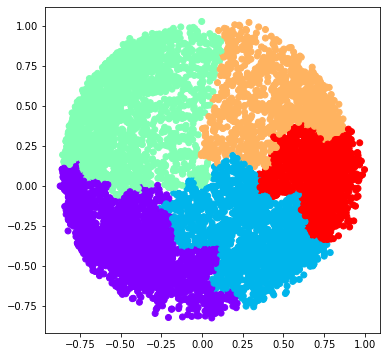

In [39]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

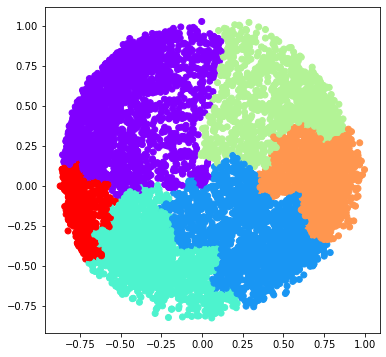

In [42]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

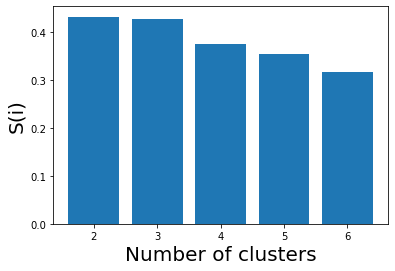

In [38]:
k = [2, 3, 4, 5, 6] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
		silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
		silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
		silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
		silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
		silhouette_score(X_principal, ac6.fit_predict(X_principal))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

